<center>
<p><img src="https://mcd.unison.mx/wp-content/themes/awaken/img/logo_mcd.png" width="100">
</p>


# Curso Propedéutico en *Programación*

# Proyecto de programación: El indice de marginalización de México


#### Jesús Guillermo Rojas Murrieta

<p>
<img src="https://identidadbuho.unison.mx/wp-content/uploads/2019/06/letragrama-cmyk-72.jpg" width="200">
</p>
    
</center>

Para comenzar, haremos los ajustes necesarios para poder trabajar los datos y realizar los problemas solicitados dentro de la libreta. 

Para ello, importaremos las librerías necesarias de las cuales haremos uso en un futuro

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Verifiquemos en cual dirección nos encontramos ubicados

In [27]:
%pwd

'C:\\Users\\GUILLE\\Desktop\\Python\\Propedeuticos\\Programación'

## Descargar y leer el dataset

Ahora, pasaremos a descargar y leer la base de datos de marginación

In [39]:
url = 'C:\\Users\\GUILLE\\Desktop\\Python\\Propedeuticos\\Programación\\IMM.csv'
df = pd.read_csv(url)

## Mostrar la descripción del DataFrame y algunos hallazgos interesantes
Una vez cargada nuestra base de datos a la libreta, pasaremos a ver la información de los datos y de que tratan. Siguiendo las buenas practicas

In [42]:
# Información del dataframe
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2469 entries, 0 to 2468
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CVE_ENT   2469 non-null   int64  
 1   NOM_ENT   2469 non-null   object 
 2   CVE_MUN   2469 non-null   int64  
 3   NOM_MUN   2469 non-null   object 
 4   POB_TOT   2469 non-null   int64  
 5   ANALF     2469 non-null   float64
 6   SBASC     2469 non-null   float64
 7   OVSDE     2469 non-null   float64
 8   OVSEE     2469 non-null   float64
 9   OVSAE     2469 non-null   float64
 10  OVPT      2469 non-null   float64
 11  VHAC      2469 non-null   float64
 12  PL.5000   2469 non-null   float64
 13  PO2SM     2469 non-null   float64
 14  IM_2020   2469 non-null   float64
 15  GM_2020   2469 non-null   object 
 16  IMN_2020  2469 non-null   float64
dtypes: float64(11), int64(3), object(3)
memory usage: 328.0+ KB
None


In [45]:
# Descripción del dataframe
df.describe()

,CVE_ENT,CVE_MUN,POB_TOT,ANALF,SBASC,OVSDE,OVSEE,OVSAE,OVPT,VHAC,PL.5000,PO2SM,IM_2020,IMN_2020
count,2469.000000,2469.000000,2.469000e+03,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000
mean,19.215472,19324.164844,5.103849e+04,10.164466,45.853026,3.159963,1.500793,6.118145,7.987232,26.566286,69.900469,82.143854,53.955581,0.844869
std,7.367340,7382.892458,1.469907e+05,7.633633,13.981594,5.289299,2.769167,9.245995,8.973591,10.586540,35.267726,11.830444,3.904590,0.061140
min,1.000000,1001.000000,8.100000e+01,0.353446,5.535137,0.000000,0.000000,0.000000,0.000000,3.950392,0.000000,28.453113,21.406635,0.335198
25%,14.000000,14079.000000,4.489000e+03,4.427755,35.737568,0.651869,0.366077,0.878499,1.654653,18.725100,40.129696,74.615600,51.844432,0.811812
50%,20.000000,20226.000000,1.355200e+04,8.202762,46.339439,1.428250,0.828157,2.452316,4.714141,25.000000,100.000000,84.643266,54.423506,0.852196
75%,24.000000,24027.000000,3.528400e+04,13.787294,55.856378,3.342618,1.678328,7.285869,11.029646,32.820816,100.000000,91.620112,56.696126,0.887782
max,32.000000,32058.000000,1.922523e+06,53.071253,88.328076,64.450424,53.065463,81.788441,68.149764,69.564018,100.000000,100.000000,62.397145,0.977052


##### Datos a resaltar
Haciendo una revisión rápida de los datos, se puede observar como en promedio el 45.85% de la población de México no cuenta con educación básica, lo que a mi parecer condiciona en gran medida el indice de marginación.

También podemos observar que la media del porcentaje de poblacion que trabaja tiene salario menor a 2 veces el minimo es de 82.14%, esto igual puede estar relacionado con el indice de marginación, ya que nos representaría una gran cantidad de población la cual no cuenta con los recursos ni oportunidades con las que disponen los mexicanos que se encuentran en ciudades.

Por último, me gustaría recalcar como hay muchas localidades que tienen menos de 5,000 habitantes, hay maximos donde se tiene el 100% y minimo de 0, el promedio es el 53.95%. Esto nos debe dar a entender que tenemos que tener cuidado a la hora de analizar los graficos con estos datos, ya que al analizar por comunidad, puede que no sean representativos a nivel poblacional.

## Gráfica de porcentaje de municipios por estado con índices de marginación.
A continuación, pasaremos a graficar por municipio como observamos el índice de marginación, posteriormente, convertiremos la gráfica obtenida en formato png.

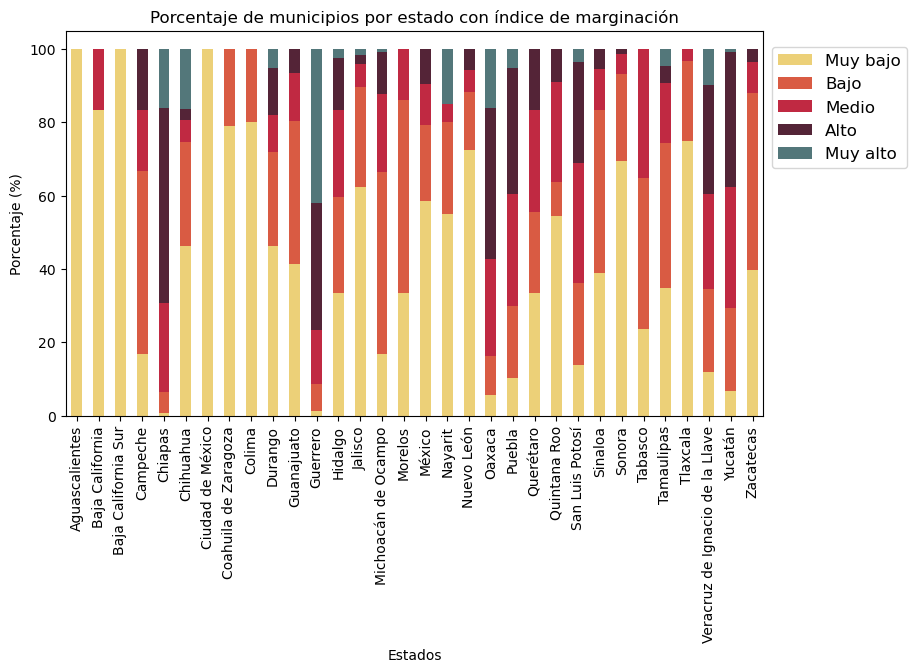

In [56]:
#Primero, vamos a agrupar  por estado y grado de marginación, además de contar la cantidad de municipios por grupo
mun_est_indice = df.groupby(['NOM_ENT', 'GM_2020']).size().unstack(fill_value=0)

# ahora, creamos una lista de las etiquetas del grado de marginación para manejarla con mayor facilidad
lista_marginacion = ['Muy bajo', 'Bajo', 'Medio', 'Alto', 'Muy alto']

# personalizamos los colores de la gráfica para una mejora visual
colores = ['#ECD078', '#D95B43', '#C02942', '#542437', '#53777A']

# luego, calculamos el porcentaje de municipios por grado de marginación por estado
porciento = mun_est_indice.div(mun_est_indice.sum(axis=1), axis=0)[lista_marginacion] * 100

# después, pasaremos a graficar en una gráfica de barras el resultado del porcentaje de municipios
porciento.plot(kind='bar', stacked=True, figsize=(9, 5), color=colores)

# agregamos las descripciones correspondientes a la gráfica que vamos a generar
plt.title('Porcentaje de municipios por estado con índice de marginación')
plt.xlabel('Estados')
plt.ylabel('Porcentaje (%)')
plt.legend(lista_marginacion, bbox_to_anchor=(1, 0.98), fontsize=12)

# guardamos la gráfica generada en un archivo png
plt.savefig('porcentaje_municipio_estado_indice.png', bbox_inches='tight')

# imprimir gráfica
plt.show()

## Gráfica del porcentaje de población, con respecto a la población total de cada estado

En este punto, haremos una gráfica similar a la del punto anterior, solo que aquí será el porcentaje de población con respecto a la pooblación total por estado. Al obtener la gráfica deseada, ésta será guardada en formato jpg.

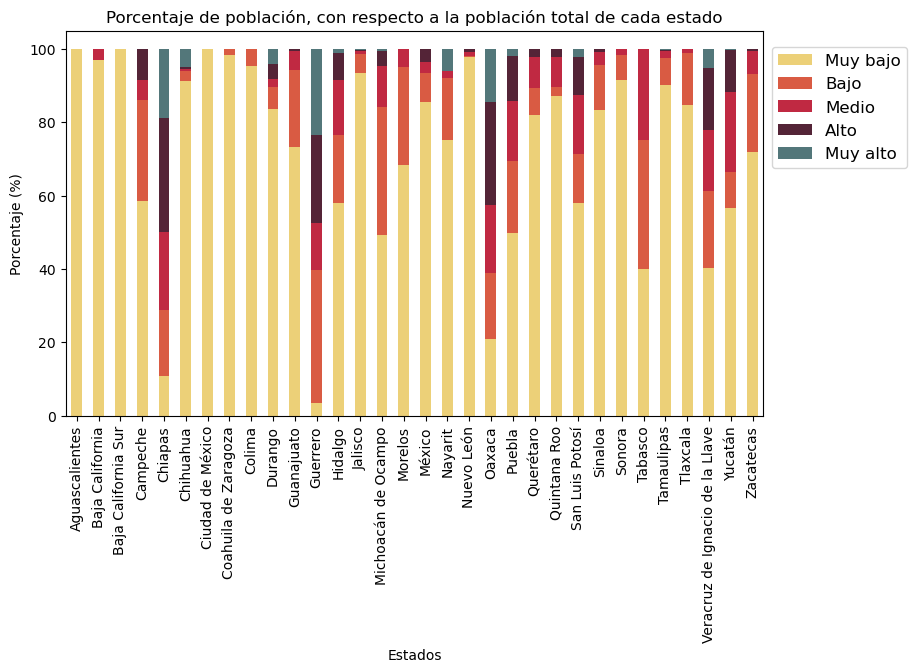

In [57]:
# Primero, agrupamos los datos por estado y grado de marginación, y sumarle la población total por grupo
agrupar = df.groupby(['NOM_ENT', 'GM_2020'])['POB_TOT'].sum()

# luego, desagrupamos los datos, así tnemos los grados de marginación por columna y rellenamos los valores nulos con 0. Esto para poder
# manejar todos los datos en del DataFrame
desagrupar = agrupar.unstack(fill_value=0)

# después, creamos una lista de las etiquetas del grado de marginación para manejarla con mayor facilidad
lista_marginacion = ['Muy bajo', 'Bajo', 'Medio', 'Alto', 'Muy alto']

# ahora pasamos a calcular el porcentaje de población por grado de marginación para cada estado
porcentaje = (desagrupar / desagrupar.sum(axis=1).values.reshape(-1, 1))[lista_marginacion] * 100

# definimos los colores a utilizar en nuestra gráfica
colores = ['#ECD078', '#D95B43', '#C02942', '#542437', '#53777A']

# creamos una gráfica de barras apiladas con la siguientes características
porcentaje.plot(kind='bar', stacked=True, figsize=(9, 5), color=colores)

# describimos los elementos visuales que debe contener nuestro gráfico
plt.title('Porcentaje de población, con respecto a la población total de cada estado')
plt.xlabel('Estados')
plt.ylabel('Porcentaje (%)')
plt.legend(lista_marginacion, bbox_to_anchor=(1, 0.98), fontsize=12)

# por último, guardaremos la gráfica generada en formato jpg
plt.savefig('porcentaje_poblacion_municipio_estado_indice.jpg', bbox_inches='tight')

# imprimimos la gráfica en pantalla
plt.show()

## Análisis de las gráficas anteriores

Primero, podemos comparar la morfología de las gráficas, ya que ambas se componen del mismo intervalo, que son los estados y el rango que es el porcentaje (una en base a la población y la otra en base a los municipios).

De esta información podemos sacar que la gráfica en relación al municipio  nos haría pensar que los niveles de marginación son muy elevados, ya que ganan mucho terreno las barras con nivel medio, alto y muy alto.

Por otra parte, al analizar la gráfica en relación a la población total, vemos como el porcentaje disminuye, y ahora aparecen en menor proporción los golores grises y gindas, que nos dice que hay una marginación muy alta y alta, respectivamente. 

Con esto, podemos concluir que la razón por la cuál hay mayor porcentaje de marginación cuando se analiza por municipio que por población, es el hecho que existen una gran cantidad de municipios que cuentan con poca cantidad de habitantes. Así, podemos ver que los en proporción los municipios con pocos habitantes influyen mucho en la gráfica por municipio, y esto nos deja inferir a su vez que las comunidades donde existen grandes numeros de personas, tiende a existir menos gente analfabeta.

Por mencionar un ejemplo, para el estado de **Guerrero**, vemos que en la gráfica por municipio, el porcentaje de marginación alto y muy alto es del 75%. En cambio, en la gráfica por población, vemos que para esos niveles de marginación corresponde el 55%.

## Gráfica de la relación del porcentaje de analfabetismo con respecto al porcentaje de poblaciones en localidades de menos de 5,000 habitantes

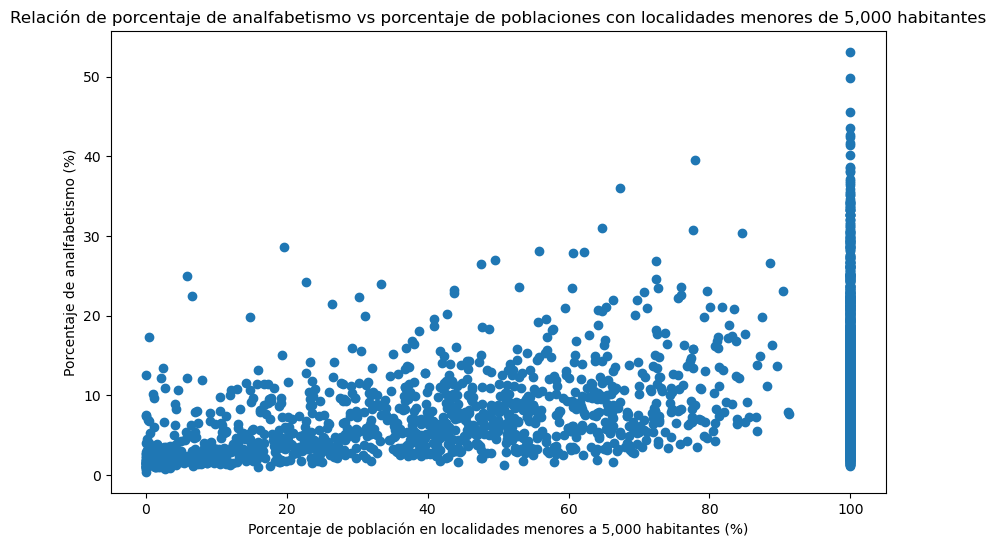

In [73]:
# Primero, hagamos la función que relacione la variable del porcentaje de analfabetismo y el porcentaje de poblaciones
plt.figure(figsize=(10, 6))
pob_vs_an = plt.scatter(df ['PL.5000'], df ['ANALF'])

# ahora, describamos los elementos que contiene este gráfico
plt.title('Relación de porcentaje de analfabetismo vs porcentaje de poblaciones con localidades menores de 5,000 habitantes')
plt.xlabel('Porcentaje de población en localidades menores a 5,000 habitantes (%)')
plt.ylabel('Porcentaje de analfabetismo (%)')

# imprimimos la gráfica
plt.show()

## Relación entre las variables

#### ¿Existe una relación?
A simple vista, no podemos obtener mucha información de la gráfica, no parece que exista una correlación entre estas dos variables.

Para despejar cualquier duda, pudamos hacer uso del coeficiente de correlación, para que nos dé un valor matemático de como se comportan estas variables entre sí

In [75]:
# Primero, definimos la función que nos proporciona la correlación entra las dos variables
correlacion = df['PL.5000'].astype(float).corr(df['ANALF'].astype(float))

# imprimimos su valor
print('El coeficiente de correlación entre las variables es de', correlacion)

El coeficiente de correlación entre las variables es de 0.44932439352045783


Al obtener un valor muy pequeño del coeficiente de correlación, podemos observar que la relación de estas dos variables es muy baja

#### Variable con mayor correlación con el porcentaje de analfabetismo
Para buscar cuál es la variable que tiene un mayor correlación con el porcentaje de analfabetismo, haremos un mapa de calor o _heatmap_ para poder obtener la respuesta de una manera mas visual y sencilla.

Text(0.5, 1.0, 'Correlación entre las variables')

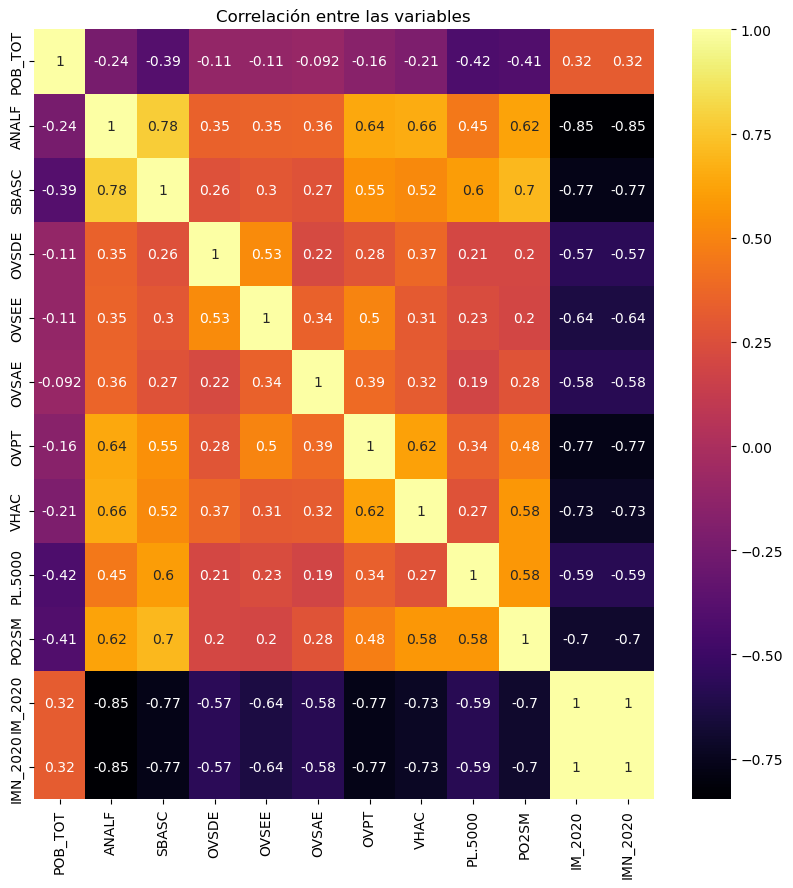

In [99]:
# Primero, haremos la función que contenga la correlación entre todas las variables numericas del DataFrame
df_corr = df[
    ['POB_TOT', 
     'ANALF', 
     'SBASC', 
     'OVSDE', 
     'OVSEE', 
     'OVSAE', 
     'OVPT', 
     'VHAC', 
     'PL.5000', 
     'PO2SM', 
     'IM_2020', 
     'IMN_2020']
].corr(numeric_only = True)

# ahora, pasamos a hacer el heatmap de la correlación
plt.figure(figsize=(10, 10))
sns.heatmap(df_corr, annot = True, cmap = 'inferno')
plt.title('Correlación entre las variables')

Si nos enfocamos en la variable **ANALF**, vemos que tiene la mayor correlación con la variable **SBASC**, que hace referencia al porcentaje de población mayor a 15 años sin educación básica.

Esto puede parecer lógico, ya que es más probable que las personas que no tuvieron acceso a una educación formal tengan mayor dificultad para educarse. Y con el mapa de calor que nos deja ver la correlación con todas las variables, deja este motivo claro y cuantificable.

## Desarrolla un nuevo DataFrame con indicadores interesantes

In [105]:
# Primero, importaremos las librerías copy y pyarrow a la libreta
import copy
!pip install pyarrow
import pyarrow as pa
import pyarrow.parquet as pq

# ahora, crearemos un nuevo DataFrame tomando los elementos pasados sobre los municipios y estados, ignorando los indicadores
df_nuevo = df[['CVE_ENT', 'NOM_ENT', 'CVE_MUN', 'NOM_MUN', 'POB_TOT']].copy()

# después, pasamos a agregar nuevos indicadores que consideremos interesantes
df_nuevo['BIB_CER'] = pd.Series(dtype = float)
df_nuevo['COM_DIA'] = pd.Series(dtype = float)
df_nuevo['HOR_CLA'] = pd.Series(dtype = float)
df_nuevo['ACC_INT'] = pd.Series(dtype = float)

# luego, convertimos el DataFrame a una tabla de Pyarrow
tabla = pa.Table.from_pandas(df_nuevo)

# especificamos el nombre con el cual queremos guardar el archivo
filename = 'df_nuevo.parquet'

# por último, guardamos el nuevo DataFrame en el formato solicitado
pq.write_table(tabla, filename)

#### Diccionario 

**BIB_CER:** Este indicador hace referencia al porcentaje de las viviendas que cuenten con una biblioteca a 1km de distancia para su fácil acceso. Este parametro sería interesante de ver ya que al existir bibliotecas en las comunidades puede bajar el nivel de analfabetismo por aquellas personas que estudien de manera autodidacta o los que lean y adquieran conocimientos por leer un libro acerca de un tema que les guste

**COM_DIA:** Este indicador sirve para medir el porcentaje de la población que es capaz de comer 3 veces diarias, esto ya que la alimenatación es una parte fundamental para el concimiento. Si uno se alimenta bien, puede concentrarse y aprender mejor. También porque puede ser que si no alcance para comer lo necesario, las personas se ven incitadas a trabajar más para buscar cumplir sus necesidades y le den una menor prioridad al estudio.

**HOR_CLA:** Este indicador es para cuantificar la cantidad de horas escolares con las que cuenta la población. Se podría esperar que a mayores horas de clases recibidas, el nivel de analfabetismo debería a reducirse.

**ACC_INT:** Este indicador es el porcentaje de población que cuentan con acceso a internet. En estos días, aprener através de la red es de lo más normal, ya que la cantidad de información de diversos tipos es bastante extensa. La falta de acceso a internet puede impactar al no poder tener una manera para indagar acerca de ciertos temas através de internet.

Con estos indicadores, sería interesante ver politicas publicas que podrían realizarse. Por mencionar un ejemplo, en base a los datos que podrían arrojar el análisis de estos indicadores, podría presupuestarse obras públicas colocadas de manera estrategica donde se entregue alimentos y acceso a libros e internet a la mayor cantidad de población posible dentro de una comunidad.

## Conclusión

Es un trabajo básico pero con buenas bases de lo que se puede hacer utilizando python. Con este programa y manejando las bases de datos correctamente, podemos hacer análisis de problemáticas para poder detectar problemas y actuar en base a los datos obtenidos en nuestros modelos.

Con este proyecto se puede vislumbrar que es lo que se espera de un cientifico de datos, que maneje las herramientas que están a la mano para obtener información, y que sea capaz de darle un sentido a lo que se está analizando.

## Referencias

Comisión Nacional de Población (CONAPO). (04/10/2021). Índices de Marginación 2020. Recuperado de https://www.gob.mx/conapo/documentos/indices-de-marginacion-2020-284372